In [1]:
## TensorFlow 1 example

import numpy as np
import tensorflow as tf
print(tf.__version__)

2.1.0


## TensorFlow 1 Example

This code implements a simple multi-layer perceptrong (MLP) in TensorFlow 1.

You won't be able to run this example, as this is written in TensorFlow 1. It's there for you to see how much easier TensorFlow 2 makes it to write code.

In [2]:
tf.reset_default_graph()

# Defining input placeholder
x = tf.placeholder(shape=[1,4],dtype=tf.float32)

# Defining layer 1 variables
w1 = tf.Variable(tf.initializers.truncated_normal()(shape=[4,3]), dtype=tf.float32)
b1 = tf.Variable(tf.initializers.truncated_normal()(shape=[1,3]), dtype=tf.float32)

# Defining layer 2 variables
w2 = tf.Variable(tf.initializers.truncated_normal()(shape=[3,2]), dtype=tf.float32)
b2 = tf.Variable(tf.initializers.truncated_normal()(shape=[1,2]), dtype=tf.float32)

# Computing h
h = tf.matmul(x, w1) + b1
h = tf.nn.sigmoid(h)

# Computing y
y = tf.matmul(h, w2) + b2
y = tf.nn.softmax(y)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  # Executing the graph in order to obtain y for a given input
  res = sess.run(y, feed_dict={x: np.random.normal(size=[1,4])})
  print(res)

AttributeError: module 'tensorflow' has no attribute 'reset_default_graph'

## TensorFlow 2 example

This code implements the same multi-layer perceptron algorithm with TensorFlow 2. Can you see the difference from the previous code? There's no separation of graph definition and execution. They both happen simultaneously.

In [3]:
import numpy as np
import tensorflow as tf

@tf.function
def forward(x, W, b, act):
    return act(tf.matmul(x,W)+b)

# Input (numpy array)
x = np.random.normal(size=[1,4]).astype('float32')

# Variable initializer
init = tf.keras.initializers.RandomNormal()

# Defining layer 1 variables
w1 = tf.Variable(init(shape=[4,3]))
b1 = tf.Variable(init(shape=[1,3]))

# Defining layer 2 variables
w2 = tf.Variable(init(shape=[3,2]))
b2 = tf.Variable(init(shape=[1,2]))

# Computing h
h = forward(x, w1, b1, tf.nn.sigmoid)

# Computing y
y = forward(h, w2, b2, tf.nn.softmax)

print(y)

tf.Tensor([[0.4720115 0.5279885]], shape=(1, 2), dtype=float32)


## Arithmatic and Comparison Operations in TensorFlow

Here we will discuss some arithmatic operations (e.g. addition, multiplication) and comparison operators (e.g. element-wise equality)

In [2]:
import tensorflow as tf
import numpy as np
# Fixing the seed to obtain consistent random values during multiple runs
np.random.seed(4321)

a = tf.constant(4, shape=[4], dtype='float32')
b = tf.constant(2, shape=[4], dtype='float32')
print(a)
print(b)
# Arithmatic operations

c = a + b  # Addition
print(c)
d = a - b  # Subtraction
e = a * b  # Multiplication
f = a / b  # Division

# Logical operations

a = tf.constant([[1,2,3],[4,5,6]])
b = tf.constant([[5,4,3],[3,2,1]])

equal_check = (a == b) # Element-wise equality
print(equal_check)
leq_check = (a <= b) # Element-wise less than or equal

tf.Tensor([4. 4. 4. 4.], shape=(4,), dtype=float32)
tf.Tensor([2. 2. 2. 2.], shape=(4,), dtype=float32)
tf.Tensor([6. 6. 6. 6.], shape=(4,), dtype=float32)
tf.Tensor(
[[False False  True]
 [False False False]], shape=(2, 3), dtype=bool)


In [3]:
a = tf.constant(np.random.normal(size=[5,4,3]), dtype='float32')
print(a)

# Reduction operations
red_a1 = tf.reduce_sum(a)
print(red_a1)
red_a2 = tf.reduce_prod(a, axis=0)
print(red_a2)
red_a3 = tf.reduce_min(a, axis=[0,1])
print(red_a3)
red_a4 = tf.reduce_min(a, axis=1)
print(red_a4)
red_a5 = tf.reduce_min(a, axis=1, keepdims=True)
print(red_a5)

tf.Tensor(
[[[-0.7665215   0.9611947   1.456347  ]
  [-0.52979267 -0.2647674  -0.57217133]
  [-0.7511135   2.2282166   0.6573406 ]
  [-1.1323775   0.3301812   0.1310132 ]]

 [[ 0.8014518  -1.462713   -1.4113897 ]
  [-1.6531237  -0.14342971  0.51649004]
  [ 1.2800875  -1.2251385  -0.77911323]
  [-0.12907887  0.5554081   0.41840178]]

 [[ 0.3293098   1.140024   -0.00801868]
  [ 0.7699546  -1.3530449  -0.65235037]
  [-1.6503361   0.98659414  1.746369  ]
  [-0.29749674  0.36506456 -1.4723392 ]]

 [[ 0.5332363  -1.6245098  -1.3576707 ]
  [-0.76749927  0.28458712 -1.3440554 ]
  [-0.9872801  -1.0518827  -0.35707638]
  [-1.2846583   1.9658499   0.16300984]]

 [[ 0.42760614  0.17308706 -0.90879506]
  [ 0.5347165   2.569637    1.3013649 ]
  [ 0.95198756 -0.74183583 -1.2316796 ]
  [-0.03830088  1.1367576  -1.2704859 ]]], shape=(5, 4, 3), dtype=float32)
tf.Tensor(-4.504758, shape=(), dtype=float32)
tf.Tensor(
[[-0.04612858  0.45068324  0.02033644]
 [-0.27674386 -0.03757534 -0.33719817]
 [-1.491383

In [5]:
# Computing argmax
d = tf.constant([[1,2,3],[3,4,5],[6,5,4]])
d_max1 = tf.argmax(d, axis=0)
print(d_max1)

# Computing argmin
d = tf.constant([[1,2,3],[3,4,5],[6,5,4]])
d_min1 = tf.argmin(d, axis=1)
print(d_min1)

# Computing cumulative sum
e = tf.constant([1,2,3,4,5])
e_cumsum = tf.cumsum(e)
print(e_cumsum)

# Bonus: Segmented sum
f = tf.constant(np.random.normal(size=[10]))
segments = [0,0,0, 0, 1, 1, 1, 2,2, 3]
f_sum = tf.math.segment_sum(e, segments)
print(f_sum)

tf.Tensor(
[[[ 1.84494449 -0.42004461]
  [ 0.93079172 -1.24044389]
  [-3.15465479  0.28591948]]

 [[-0.12430964 -1.38102755]
  [-0.25411903 -0.84681679]
  [-0.46021717  0.79754072]]

 [[ 0.14759021  0.83403538]
  [-1.32280807 -0.2603396 ]
  [ 1.08436808  0.21968335]]

 [[ 0.44165461 -1.18752232]
  [ 0.75608149  1.00629653]
  [-0.7719925   0.67909529]]], shape=(4, 3, 2), dtype=float64)
tf.Tensor(
[[0 2]
 [0 3]
 [2 1]], shape=(3, 2), dtype=int64)
tf.Tensor(
[[0 2]
 [0 2]
 [2 0]
 [1 1]], shape=(4, 2), dtype=int64)


## Neural network related operations

In this section we will discuss several neural network related operations. Namely they are matrix multiplication, convolution operation and pooling operation. 

Matrix multiplication is a commonly used operation in neural networks, that is used to compute the hidden layer output. The convolution and pooling operations essential when implementing convolution neural networks.

### The data

Here to learn these operations, we will be obtraining various effects from an image. The image we will be using is famously known as "Lena". 

### Matrix Multiplication

We saw the matrix multiplication in action while implementing the MLP in the earlier exercises. Matrix multiplication taks a matrix $A$ of size $n\times m$ and a matrix $B$ of size $m\times p$ and produce a new matrix of size, $n\times p$.

Here we will be using matrix multiplication to convert a RGB image to a black and white image.

(512, 512)


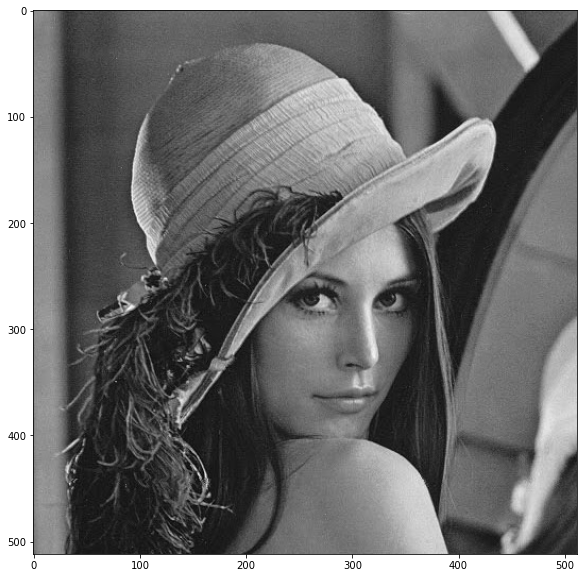

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x_rgb = np.array(Image.open("lena.jpg")).astype('float32')
x_rgb = tf.constant(x_rgb)

grays = tf.constant([[0.3], [0.59] ,[0.11]])

x = tf.matmul(x_rgb, grays)
x = tf.squeeze(x)
print(x.shape)
#a = tf.constant(np.random.normal(size=[3,5,7]))
#b = tf.constant(np.random.normal(size=[3,7,8]))
#c = tf.matmul(a, b)
#print(c.shape)
f, axes = plt.subplots(1,1, figsize=(5,5))

axes.imshow(x.numpy(),cmap='gray')
axes.axis('off')

### Convolution operation

The convolution operation shifts a small window of the image while performing a spefic computation at each position, using the parameters of the window and the pixels overlapping the window. Specifically, the computation is taking element-wise multiplication and summing the values to produce a single scalar. 

We will use the convolution operation to perform edge detection on the image of Lena.

In [49]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

y = tf.constant(x)

f = tf.Variable(np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]).astype('float32'))

y_reshaped = tf.reshape(y, [1,512,512,1])
f_reshaped = tf.reshape(f, [3,3,1,1])

y_conv = tf.nn.convolution(y_reshaped, f_reshaped)
print(np.min(y), np.max(y))
def improve_contrast(x,n=3):
    return np.clip(x*n, np.min(x), np.max(x))
y_conv_clipped = improve_contrast(y_conv)
print(y.shape)

11.0 234.0
(512, 512)


#### Plotting the results

Text(0.5, 1.0, 'Result after Edge Detection')

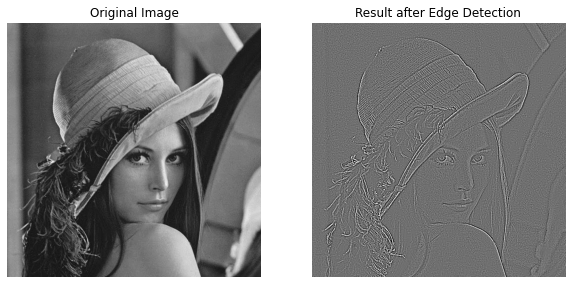

In [50]:
f, axes = plt.subplots(1,2, figsize=(10,10))

axes[0].imshow(np.squeeze(x.numpy()),cmap='gray')
axes[1].imshow(np.squeeze(y_conv_clipped),cmap='gray')

axes[0].axis('off')
axes[0].set_title('Original Image')
axes[1].axis('off')
axes[1].set_title('Result after Edge Detection')

### Pooling operation

The pooling operation does a similar job to the convolution operation, where it shifts a small window over the image. However, the window itself doesn't have parameters. Therefore at each position the operation produces the maximum value (*max-pooling*) of the overlapping pixels or the average value (*average-pooling*) of the overlapping pixels.

We will use the pooling operation to reduce the size of the edge detected image we produced in the previous step.

In [51]:
z_avg = tf.nn.avg_pool(y_conv, (1,2,2,1), strides=(1,2,2,1), padding='VALID')
z_max = tf.nn.max_pool(y_conv, (1,2,2,1), strides=(1,2,2,1), padding='VALID')

z_avg = np.squeeze(z_avg.numpy())
z_max = np.squeeze(z_max.numpy())

print(z_avg.shape)
z_avg_padded = np.pad(z_avg, (512-z_avg.shape[0])//2, constant_values=np.max(z_avg))
z_max_padded = np.pad(z_max, (512-z_max.shape[0])//2, constant_values=np.max(z_max))
print(z_avg_padded.shape)

(255, 255)
(511, 511)


#### Plotting the results

Text(0.5, 1.0, 'Result after Max-Pooling')

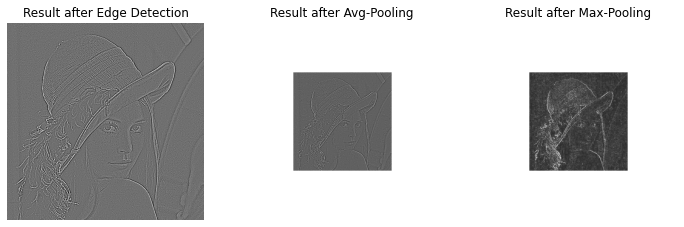

In [52]:
f, axes = plt.subplots(1,3, figsize=(12,20))
axes[0].imshow(np.squeeze(y_clipped),cmap='gray')
axes[1].imshow(improve_contrast(z_avg_padded,2),cmap='gray')
axes[2].imshow(improve_contrast(z_max_padded,2),cmap='gray')

axes[0].axis('off')
axes[0].set_title('Result after Edge Detection')
axes[1].axis('off')
axes[1].set_title('Result after Avg-Pooling')
axes[2].axis('off')
axes[2].set_title('Result after Max-Pooling')

## Keras Model Building APIs

### Understanding the data

This is a famous dataset known as the *iris* dataset. The dataset records the petal width/length and sepal width/length for three different kinds of iris flowers.

* Iris-setosa
* Iris-versicolor
* Iris-virginica

The goal is to train a model that, given the petal width/length and sepal width/length, predicts the correct species of flower.

In [17]:
import requests
import pandas as pd

# Retrieve the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
r = requests.get(url)

with open('iris.data', 'wb') as f:
  f.write(r.content)

# Read the data in
iris_df = pd.read_csv('iris.data', header=None)

# Set the column names
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_width', 'petal_length', 'label']
print(iris_df.label.unique())

# Convert labels to integers
iris_df["label"] = iris_df["label"].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# Shuffle the data
iris_df = iris_df.sample(frac=1.0, random_state=4321)

# Normalize the features by subtracting the mean
x = iris_df[["sepal_length", "sepal_width", "petal_width", "petal_length"]]
x = x - x.mean(axis=0)

# Converting integer labels to one-hot vectors
y = tf.one_hot(iris_df["label"], depth=3)

iris_df.head()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,sepal_length,sepal_width,petal_width,petal_length,label
31,5.4,3.4,1.5,0.4,0
23,5.1,3.3,1.7,0.5,0
70,5.9,3.2,4.8,1.8,1
100,6.3,3.3,6.0,2.5,2
44,5.1,3.8,1.9,0.4,0


### Sequential API

The Sequential API is the easiest to use. It can be used to define a simple model that has one input, one output and a sequence of intermediate layers in the middle.

Here we are defining a model with following layers.

* A `Dense` layer with 32 nodes and relu activation
* A `Dense` layer with 16 nodes and relu activation
* A `Dense` layer with 3 nodes and softmax activation

Finally we train the model using a batch size of 64 and for 10 epochs.

In [69]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.fit(x, y, batch_size=64, epochs=10)

Train on 150 samples
Epoch 1/100
150/150 [==============================] - 0s 2ms/sample - loss: 0.8922 - acc: 0.7000
Epoch 2/100
150/150 [==============================] - 0s 104us/sample - loss: 0.8545 - acc: 0.7267
Epoch 3/100
150/150 [==============================] - 0s 104us/sample - loss: 0.8192 - acc: 0.7400
Epoch 4/100
150/150 [==============================] - 0s 104us/sample - loss: 0.7857 - acc: 0.7400
Epoch 5/100
150/150 [==============================] - 0s 104us/sample - loss: 0.7548 - acc: 0.7400
Epoch 6/100
150/150 [==============================] - 0s 208us/sample - loss: 0.7238 - acc: 0.7333
Epoch 7/100
150/150 [==============================] - 0s 104us/sample - loss: 0.6967 - acc: 0.7400
Epoch 8/100
150/150 [==============================] - 0s 104us/sample - loss: 0.6702 - acc: 0.7267
Epoch 9/100
150/150 [==============================] - 0s 104us/sample - loss: 0.6477 - acc: 0.7200
Epoch 10/100
150/150 [==============================] - 0s 208us/sample - loss: 0

150/150 [==============================] - 0s 104us/sample - loss: 0.1348 - acc: 0.9667
Epoch 83/100
150/150 [==============================] - 0s 104us/sample - loss: 0.1318 - acc: 0.9667
Epoch 84/100
150/150 [==============================] - 0s 104us/sample - loss: 0.1294 - acc: 0.9667
Epoch 85/100
150/150 [==============================] - 0s 104us/sample - loss: 0.1267 - acc: 0.9667
Epoch 86/100
150/150 [==============================] - 0s 104us/sample - loss: 0.1243 - acc: 0.9667
Epoch 87/100
150/150 [==============================] - 0s 104us/sample - loss: 0.1214 - acc: 0.9667
Epoch 88/100
150/150 [==============================] - 0s 208us/sample - loss: 0.1188 - acc: 0.9667
Epoch 89/100
150/150 [==============================] - 0s 104us/sample - loss: 0.1166 - acc: 0.9667
Epoch 90/100
150/150 [==============================] - 0s 104us/sample - loss: 0.1144 - acc: 0.9667
Epoch 91/100
150/150 [==============================] - 0s 104us/sample - loss: 0.1126 - acc: 0.9600
Epo

### Functional API

Next, the functional API lets you build more complex models. It lets you build models with parallel inputs, outputs and layers. Here, we will be using the Functional API to build a model that has two parallel `Dense` layers, a single `Dense` layer and an output `Dense` layer.

We will be using two sets of inputs for this model.

* The original inputs
* PCA features (i.e. 2 pricipal components) of the original inputs

#### Compute the PCA features

Here we compute the PCA features using the original data. We will only get the first two principal components.

In [ ]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2, random_state=4321)
x_pca = pca_model.fit_transform(x)

#### Building the model

Here we build the model. The model has

* Two parallel input layers
* Two parallel hidden layers
* A layer that concatenates two outputs
* A dense layer consuming the concatenated output
* Final output layer 

In [2]:

from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

# The two input layers
inp1 = Input(shape=(4,))
inp2 = Input(shape=(2,))

# Two parallel dense layers
out1 = Dense(16, activation='relu')(inp1)
out2 = Dense(16, activation='relu')(inp2)

# Concatenate the two outputs from the parallel layers
out = Concatenate(axis=1)([out1,out2])

# The single dense layer
out = Dense(16, activation='relu')(out)

# The final output layer
out = Dense(3, activation='softmax')(out)

# Create and compile the model
model = Model(inputs=[inp1, inp2], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 16)           80          input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 16)           48          input_2[0][0]                    
______________________________________________________________________________________________

#### Training the model

The model is trained using a batch size of 64 and for 10 epochs.

In [5]:
model.fit([x, x_pca], y, batch_size=64, epochs=10)

Train on 150 samples
Epoch 1/25
150/150 [==============================] - 0s 2ms/sample - loss: 1.0103 - acc: 0.4333
Epoch 2/25
150/150 [==============================] - 0s 134us/sample - loss: 0.9673 - acc: 0.4933
Epoch 3/25
150/150 [==============================] - 0s 167us/sample - loss: 0.9282 - acc: 0.5533
Epoch 4/25
150/150 [==============================] - 0s 102us/sample - loss: 0.8930 - acc: 0.6067
Epoch 5/25
150/150 [==============================] - 0s 197us/sample - loss: 0.8608 - acc: 0.6467
Epoch 6/25
150/150 [==============================] - 0s 136us/sample - loss: 0.8296 - acc: 0.6733
Epoch 7/25
150/150 [==============================] - 0s 133us/sample - loss: 0.8022 - acc: 0.6667
Epoch 8/25
150/150 [==============================] - 0s 134us/sample - loss: 0.7760 - acc: 0.6667
Epoch 9/25
150/150 [==============================] - 0s 166us/sample - loss: 0.7526 - acc: 0.6733
Epoch 10/25
150/150 [==============================] - 0s 134us/sample - loss: 0.7305 - ac

#### Plotting the network

We can plot a network graph of the model we have built as follows.

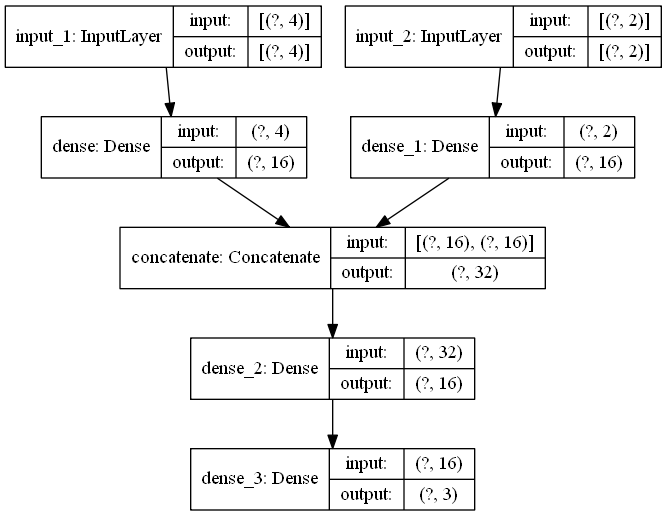

In [7]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

### Sub-classing API

The sub-classing API is considered the hardest to wield, as it requires creating a Python class for the layer or model you want to sub-class. But the added benefit is that you can implement custom computations as sub-classed objects and reuse them in a very convenient manner to create complex models.

In this exercise, we are creating a custom version of the `Dense` layer which has a multiplicative bias in addition to the additive bias. In other words, we will be implementing a new layer called `MulBiasDense` which does the following computation.

$h = \text{Activation}(xW + b \times b_{mul})$

#### Defining the custom layer

Here we define the new custom layer. This layer has three parameters (i.e. `w`, `b` and `b_mul`). When defining the new layer we need to define three important functions.

* `__init__`
* `build`
* `call`

In [81]:
from tensorflow.keras import layers

class MulBiasDense(layers.Layer):

    def __init__(self, units=32, activation=None):
        super(MulBiasDense, self).__init__()
        self.units = units
        self.activation = activation
    
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='glorot_uniform',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='glorot_uniform',
                                 trainable=True)
        self.b_mul = self.add_weight(shape=(self.units,),
                                     initializer='glorot_uniform',
                                     trainable=True)

    def call(self, inputs):
        out = (tf.matmul(inputs, self.w) + self.b) * self.b_mul
        return layers.Activation(self.activation)(out)
        


#### Defining the model

Here we define the model using the `MulBiasDense` layer we just created.

In [82]:

from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

K.clear_session()

inp = Input(shape=(4,))

out = MulBiasDense(units=32, activation='relu')(inp)
out = MulBiasDense(units=16, activation='relu')(out)

out = Dense(3, activation='softmax')(out)

model = Model(inputs=inp, outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
mul_bias_dense (MulBiasDense (None, 32)                192       
_________________________________________________________________
mul_bias_dense_1 (MulBiasDen (None, 16)                544       
_________________________________________________________________
dense (Dense)                (None, 3)                 51        
Total params: 787
Trainable params: 787
Non-trainable params: 0
_________________________________________________________________


#### Training the model

We are training the model using a batch size of 64 for 10 epochs.

In [80]:
model.fit(x, y, batch_size=64, epochs=10)

Train on 150 samples
Epoch 1/100
150/150 [==============================] - 0s 2ms/sample - loss: 1.0961 - acc: 0.3333
Epoch 2/100
150/150 [==============================] - 0s 208us/sample - loss: 1.0940 - acc: 0.3333
Epoch 3/100
150/150 [==============================] - 0s 104us/sample - loss: 1.0921 - acc: 0.3333
Epoch 4/100
150/150 [==============================] - 0s 104us/sample - loss: 1.0901 - acc: 0.3333
Epoch 5/100
150/150 [==============================] - 0s 208us/sample - loss: 1.0881 - acc: 0.3333
Epoch 6/100
150/150 [==============================] - 0s 104us/sample - loss: 1.0859 - acc: 0.3400
Epoch 7/100
150/150 [==============================] - 0s 208us/sample - loss: 1.0836 - acc: 0.3600
Epoch 8/100
150/150 [==============================] - 0s 104us/sample - loss: 1.0812 - acc: 0.3800
Epoch 9/100
150/150 [==============================] - 0s 104us/sample - loss: 1.0787 - acc: 0.4000
Epoch 10/100
150/150 [==============================] - 0s 208us/sample - loss: 1

150/150 [==============================] - 0s 104us/sample - loss: 0.2988 - acc: 0.9200
Epoch 83/100
150/150 [==============================] - 0s 208us/sample - loss: 0.2900 - acc: 0.9267
Epoch 84/100
150/150 [==============================] - 0s 104us/sample - loss: 0.2805 - acc: 0.9267
Epoch 85/100
150/150 [==============================] - 0s 104us/sample - loss: 0.2715 - acc: 0.9333
Epoch 86/100
150/150 [==============================] - 0s 104us/sample - loss: 0.2622 - acc: 0.9333
Epoch 87/100
150/150 [==============================] - 0s 104us/sample - loss: 0.2534 - acc: 0.9333
Epoch 88/100
150/150 [==============================] - 0s 104us/sample - loss: 0.2448 - acc: 0.9467
Epoch 89/100
150/150 [==============================] - 0s 104us/sample - loss: 0.2363 - acc: 0.9533
Epoch 90/100
150/150 [==============================] - 0s 104us/sample - loss: 0.2280 - acc: 0.9533
Epoch 91/100
150/150 [==============================] - 0s 104us/sample - loss: 0.2197 - acc: 0.9600
Epo